# CLASSIFICATION DENGAN K-NEAREST NEIGHBOR ALGORITHM 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### IMPORT DATA

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [3]:
"memsiahkan target variable dengan predictor variable"
X = df.drop('quality', 1)

## EKSTRAK VALUE

In [4]:
"ekstrak values menjadi n-dimansional array"
X = X.values
X # ini adalah feature matrix

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [5]:
"ekstrak target variable"
y1 = df['quality'].values
y1

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

## SPLIT DATA TRAINING DAN TEST

In [6]:
from sklearn.cross_validation import train_test_split

"split data menjadi training set dan testing set"

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state = 42)
X_train.shape

C:\Users\bitxt\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(1279, 11)

## PROSES TRAINING

In [7]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3) # mencoba jumlah K (3) neighbors
knn_model_1 = knn.fit(X_train, y_train)

## TESTING AKURASI MODEL

In [8]:
knn_result_1 = knn_model_1.score(X_test, y_test)
print("model accuracy for test set: ", knn_result_1)

model accuracy for test set:  0.453125


In [9]:
"mengetahui report detail metrics"
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.06      0.10      0.08        10
          5       0.53      0.62      0.57       130
          6       0.43      0.39      0.41       132
          7       0.40      0.29      0.33        42
          8       0.00      0.00      0.00         5

avg / total       0.45      0.45      0.45       320



In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  2,  7,  0,  0],
       [ 1,  4, 81, 40,  3,  1],
       [ 0, 11, 57, 51, 13,  0],
       [ 0,  0, 10, 18, 12,  2],
       [ 0,  0,  1,  2,  2,  0]], dtype=int64)

## LAKUKAN PROSES TRAINING DENGAN K YANG BERBEDA

In [11]:
knn_7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_model_1_k7 = knn_7.fit(X_train, y_train)
knn_result_1_k7 = knn_model_1_k7.score(X_test, y_test)
print("KNN accuracy for test set: ", knn_result_1_k7)

KNN accuracy for test set:  0.4625


In [12]:
knn_11 = neighbors.KNeighborsClassifier(n_neighbors=11)
knn_model_1_k11 = knn_11.fit(X_train, y_train)
knn_result_1_k11 = knn_model_1_k11.score(X_test, y_test)
print("KNN accuracy for test set: ", knn_result_1_k11)

KNN accuracy for test set:  0.475


In [13]:
knn_15 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn_model_1_k15 = knn_15.fit(X_train, y_train)
knn_result_1_k15 = knn_model_1_k15.score(X_test, y_test)
print("KNN accuracy for test set: ", knn_result_1_k15)

KNN accuracy for test set:  0.459375


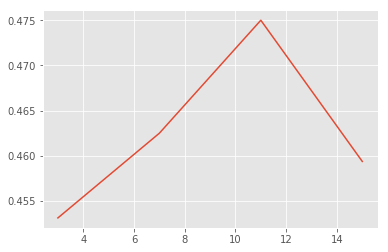

In [14]:
plt.plot([3, 7, 11, 15], [knn_result_1, knn_result_1_k7, knn_result_1_k11, knn_result_1_k15])

## Menyederhanakan kasus, mapping classification label dari multiclass menjadi binnary class

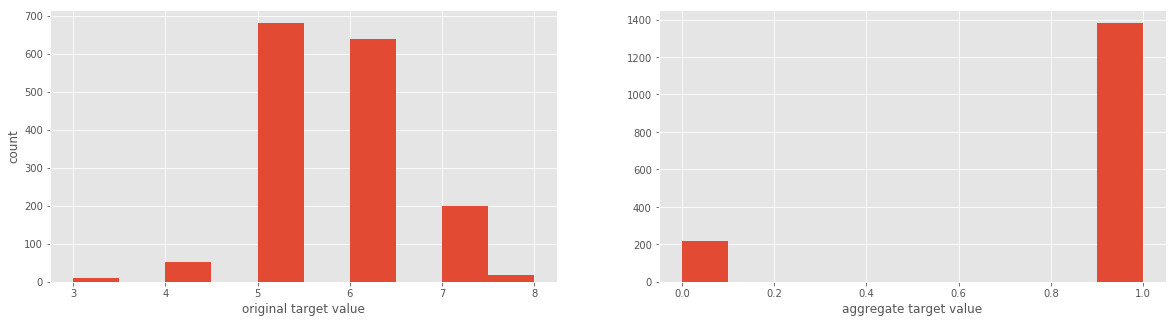

In [15]:
y = y1 <= 6

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(y1)
plt.xlabel("original target value")
plt.ylabel("count")
plt.subplot(1, 2, 2)
plt.hist(y)
plt.xlabel('aggregate target value')
plt.show()

In [16]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
       [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
       [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
       ...,
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
       [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
       [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]])

## TRAINING DATA

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_model_2 = knn.fit(X_train, y_train)

In [18]:
"Test akurasi model"
knn_result_2 = knn_model_2.score(X_test, y_test)
print("KNN MODEL 2 ACCURACY: ", knn_result_2)

KNN MODEL 2 ACCURACY:  0.85


In [19]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_2.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      False       0.48      0.34      0.40        47
       True       0.89      0.94      0.91       273

avg / total       0.83      0.85      0.84       320



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 16,  31],
       [ 17, 256]], dtype=int64)

In [21]:
X_test

array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
       [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
       [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
       ...,
       [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
       [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
       [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]])

## Data preprocessing menggunakan Scale

- Normalization adalah mengubah range data dari 0 sampai 1. Rumus: x_norm = (x-x_min)/(x_max-x_min)
- Standarization adalah memusatkan data ke nilai standard (kalau dalam statistika disebut z-score). Rumus: x_standard = (x-mean)/std

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B444AD7080>,
      dtype=object)

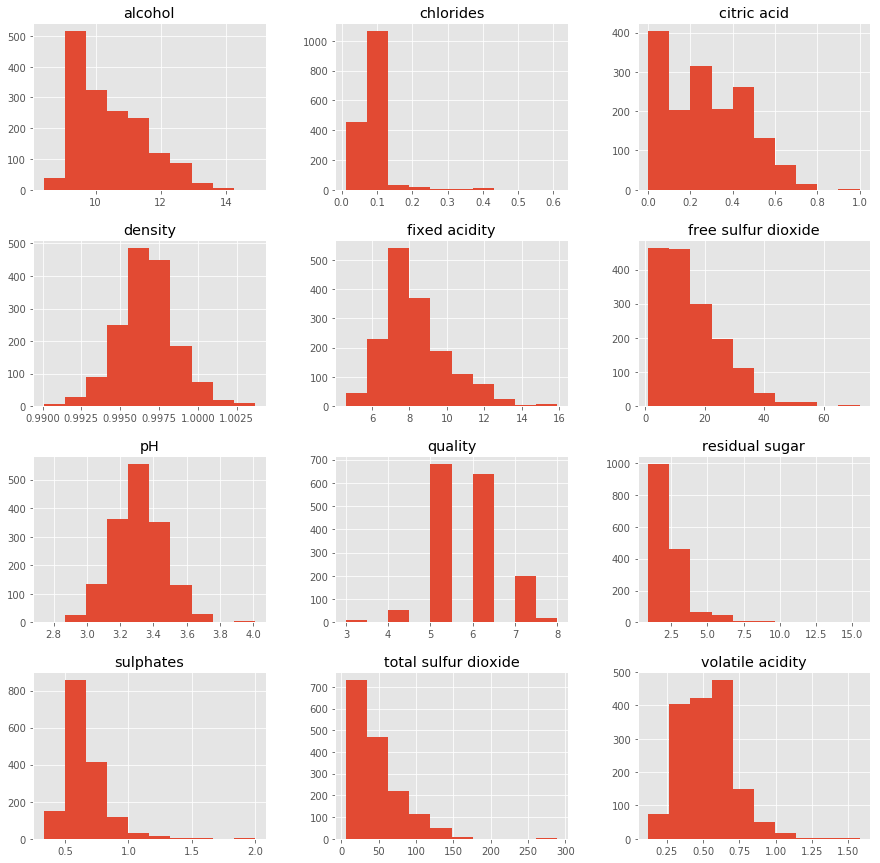

In [22]:
"exploratory data analysis"
"dari plot ini, kita bisa memahami bahwa setiap feature memiliki range yang berbeda"
pd.DataFrame.hist(df, figsize=[15, 15]) # menampilkan histogram untuk semua features dari df

In [23]:
from sklearn.preprocessing import scale
Xs = scale(X)

In [37]:
"spliting data dengan data Xs"
from sklearn.cross_validation import train_test_split
y = y1 <= 6
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
X_train

array([[ 0.21852997,  0.90601191,  0.20039205, ...,  1.09426457,
         0.48302886,  1.10483337],
       [-1.27524919, -1.77549685,  0.66254621, ..., -0.39596939,
        -0.40216729,  1.38643512],
       [ 1.48249695, -0.76993107,  1.02199944, ..., -0.07200549,
         0.54204194, -0.58477711],
       ...,
       [-0.6432657 ,  0.51495855, -1.08336951, ...,  1.28864292,
        -0.69723268, -0.86637886],
       [-0.24109439, -1.83136161,  0.4057939 , ...,  0.05758008,
         0.83710732,  1.38643512],
       [-1.44760832, -1.32857872, -0.05636026, ...,  0.51112954,
        -0.69723268,  2.8883111 ]])

In [59]:
"training untuk model knn 3"
knn = KNeighborsClassifier(n_neighbors=3)
knn_model_3 = knn.fit(X_train, y_train)
print("KNN score for test set: ", knn_model_3.score(X_test, y_test))
print("KNN score for training set: ", knn_model_3.score(X_train, y_train)) # np.expand_dims(X_test[10], axis=0)
result = knn_model_3.predict(np.expand_dims(X_test[1], axis=0))
if result == True:
    print("Bagus")
else:
    print("jelek")

KNN score for test set:  0.86875
KNN score for training set:  0.9374511336982018
Bagus


In [26]:
y_true, y_pred = y_test, knn_model_3.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      False       0.57      0.43      0.49        47
       True       0.91      0.95      0.92       273

avg / total       0.86      0.87      0.86       320

